In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
#%matplotlib inline

In [ ]:
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
!unzip '/content/StreetNumbers.zip'

In [ ]:
!ls StreetNumbers

labels_train.csv  sample_submission.csv  test  train


<class 'numpy.ndarray'>
(256, 256, 3)


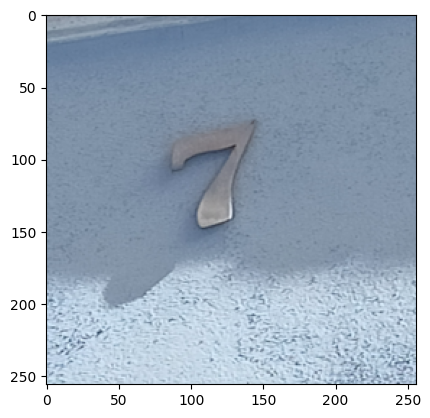

In [ ]:
import cv2
img = cv2.imread("/content/StreetNumbers/train/0040.png")
print(type(img))
print(img.shape)

imgplot = plt.imshow(img)

In [ ]:
x_train = []

# read training images and convert them into numpy array
for image_path in sorted(os.listdir("/content/StreetNumbers/train/")):
    image = plt.imread(os.path.join('/content/StreetNumbers/train/', image_path))
    # print(image)
    # print(type(image))
    print(image_path)
    x_train.append(image)


In [ ]:
# read labels of training data
train_labels = pd.read_csv('/content/StreetNumbers/labels_train.csv')
y_train = train_labels['Label']
print(train_labels['Label'].head())
print(train_labels['Label'][3])

0    1
1    3
2    3
3    5
4    7
Name: Label, dtype: int64
5


In [ ]:
x_test = []

# read testing images and convert them into numpy array
for image_path in sorted(os.listdir("/content/StreetNumbers/test/")):
    image = plt.imread(os.path.join('/content/StreetNumbers/test/', image_path))
    # print(image)
    # print(type(image))
    print(image_path)
    x_test.append(image)

In [ ]:
# read labels of testing data
test_labels = pd.read_csv('/content/StreetNumbers/labels_test.csv')
y_test = test_labels['Label']
print(test_labels['Label'].head())
print(test_labels['Label'][3])
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

0    4
1    6
2    2
3    3
4    6
Name: Label, dtype: int64
3


In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'list'>
<class 'pandas.core.series.Series'>
<class 'list'>
<class 'pandas.core.series.Series'>


In [ ]:
# convert list to numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
print(y_train[1])
print(type(y_train[1]))

print(y_test[1])
print(type(y_test[1]))

3
<class 'numpy.int64'>
6
<class 'numpy.int64'>


In [ ]:
type(x_train[0][0][0][0])

numpy.float32

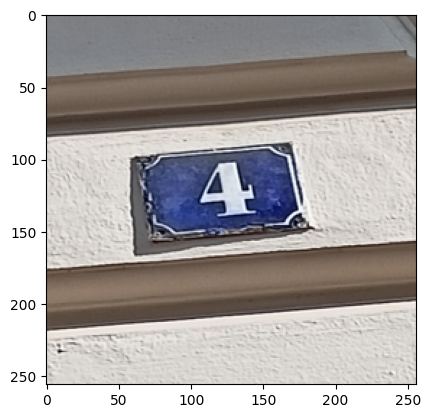

In [ ]:
plt.imshow(x_train[57])

In [ ]:
y_train[57]

4

In [ ]:
img_size = 256

# Normalize the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

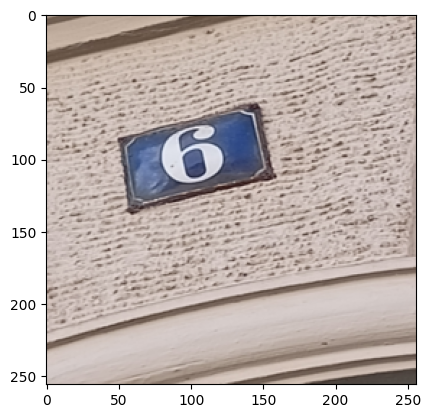

In [ ]:
plt.imshow(x_train[75])

In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(570, 256, 256, 3)
(570,)
(144, 256, 256, 3)
(144,)


In [ ]:
x_train[1]

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [ ]:
print(datagen)
datagen.fit(x_train)


In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 64)      

In [ ]:
opt = Adam(learning_rate=0.00001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())


Learning rate before first fit: 1e-05


In [ ]:
history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_test, y_test))
# history = model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


18/18 [==============================] - 73s 4s/step - loss: 2.2825 - accuracy: 0.0965 - val_loss: 2.2233 - val_accuracy: 0.1389
Epoch 2/100
18/18 [==============================] - 69s 4s/step - loss: 2.2227 - accuracy: 0.1351 - val_loss: 2.2031 - val_accuracy: 0.1389
Epoch 3/100
18/18 [==============================] - 69s 4s/step - loss: 2.2006 - accuracy: 0.1579 - val_loss: 2.1983 - val_accuracy: 0.1389
Epoch 4/100
18/18 [==============================] - 69s 4s/step - loss: 2.1994 - accuracy: 0.1474 - val_loss: 2.1939 - val_accuracy: 0.1389
Epoch 5/100
18/18 [==============================] - 68s 4s/step - loss: 2.1940 - accuracy: 0.1456 - val_loss: 2.1881 - val_accuracy: 0.1528
Epoch 6/100
18/18 [==============================] - 68s 4s/step - loss: 2.1809 - accuracy: 0.1789 - val_loss: 2.1876 - val_accuracy: 0.1389
Epoch 7/100
18/18 [==============================] - 69s 4s/step - loss: 2.1764 - accuracy: 0.1649 - val_loss: 2.1822 - val_accuracy: 0.1528
Epoch 8/100
18/18 [======

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 4s 778ms/step - loss: 2.3550 - accuracy: 0.1875


[2.355027675628662, 0.1875]

1/1 [==============================] - 0s 50ms/step
9


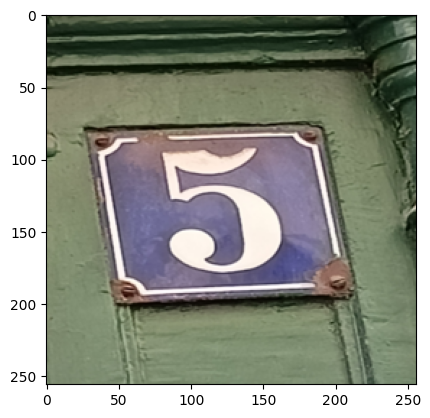

In [ ]:
image_index = 15
plt.imshow(x_test[image_index])
pred = model.predict(x_test[image_index].reshape(1, 256, 256, 3))
print(pred.argmax())

In [ ]:
import pandas as pd

predictions = model.predict(x_test)
final_preds = []

for i in predictions:
  final_preds.append(np.argmax(i))

submission_df = pd.DataFrame({
    'Sample ID': '',
    'Prediction': final_preds
})

for i in range(len(x_test)):
  submission_df['Sample ID'][i] = "{:05d}".format(i)

submission_df.to_csv('submission.csv', index=False)

5/5 [==============================] - 4s 773ms/step


<ipython-input-227-3998c356e765>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['Sample ID'][i] = "{:05d}".format(i)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 516128)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               66064512  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

### Train the model kuch sahi kar k likhna hy

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
result = model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
18/18 [==============================] - 52s 3s/step - loss: 2.3265 - accuracy: 0.1404
Epoch 2/10
18/18 [==============================] - 51s 3s/step - loss: 2.2838 - accuracy: 0.1070
Epoch 3/10
18/18 [==============================] - 48s 3s/step - loss: 2.2174 - accuracy: 0.1298
Epoch 4/10
18/18 [==============================] - 48s 3s/step - loss: 2.2211 - accuracy: 0.1368
Epoch 5/10
18/18 [==============================] - 47s 3s/step - loss: 2.2245 - accuracy: 0.1439
Epoch 6/10
18/18 [==============================] - 49s 3s/step - loss: 2.2238 - accuracy: 0.1614
Epoch 7/10
18/18 [==============================] - 49s 3s/step - loss: 2.1924 - accuracy: 0.1719
Epoch 8/10
18/18 [==============================] - 47s 3s/step - loss: 2.1800 - accuracy: 0.1579
Epoch 9/10
18/18 [==============================] - 49s 3s/step - loss: 2.1628 - accuracy: 0.1702
Epoch 10/10
18/18 [==============================] - 57s 3s/step - loss: 2.1525 - accuracy: 0.1895


### Make predictions bla bla

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 3s 530ms/step - loss: 2.2966 - accuracy: 0.1458


[2.296638250350952, 0.1458333283662796]

### Make predictions on real-world data

1/1 [==============================] - 0s 65ms/step
6


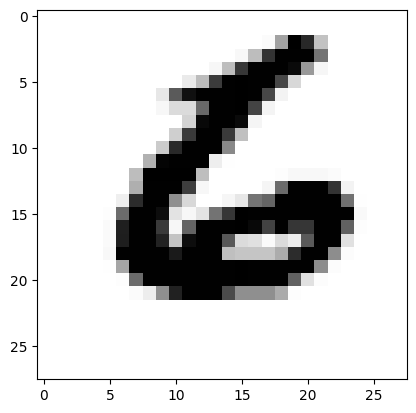

In [ ]:
image_index = 9999
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

1/1 [==============================] - 0s 71ms/step
9


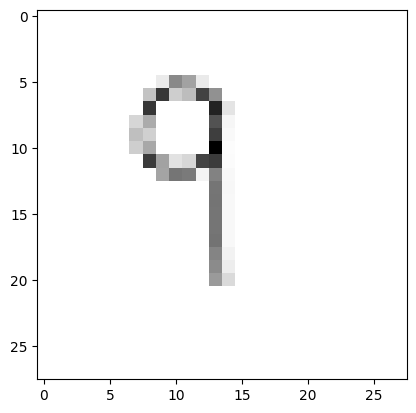

In [ ]:
im3 = cv2.imread("/content/test 9.png")
im3 = np.invert(im3)
# print(im3)
im3 = im3[:, :, 0]

plt.imshow(im3.reshape(28, 28),cmap='Greys')
pred = model.predict(im3.reshape(1, 28, 28, 1))
print(pred.argmax())

In [ ]:
import pandas as pd

predictions = model.predict(x_test)
final_preds = []

for i in predictions:
  final_preds.append(np.argmax(i))

submission_df = pd.DataFrame({
    'Sample ID': '',
    'Prediction': final_preds
})

for i in range(10000):
  submission_df['Sample ID'][i] = "{:05d}".format(i)

submission_df.to_csv('submission.csv', index=False)

313/313 [==============================] - 3s 10ms/step


<ipython-input-40-fd144d2420a5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['Sample ID'][i] = "{:05d}".format(i)


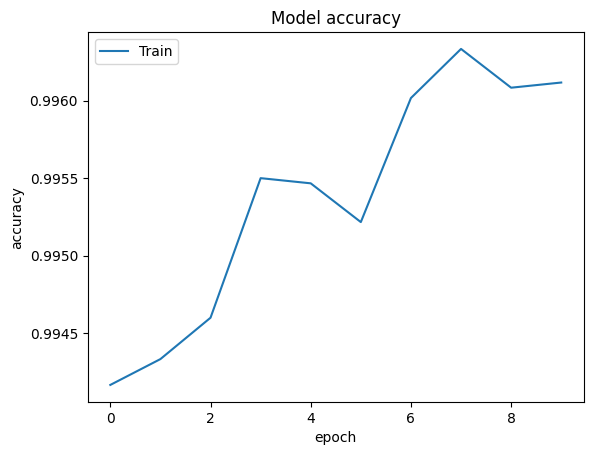

In [ ]:
plt.plot(result.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

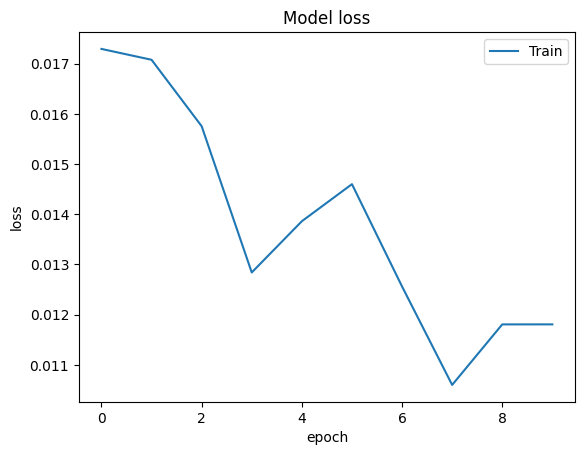

In [ ]:
plt.plot(result.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
from scipy import misc
import glob

all_test_images = []
# predictions = []
count = 0
for image_path in glob.glob("/content/MNIST/test/test/*.png"):
    image = plt.imread(image_path)
    # plt.imshow(image.reshape(28, 28),cmap='Greys')
    # print(image)
    print(image_path)
    count +=1
    # print(type(image))
    # break
    # all_test_images.append(image)
    # pred = model.predict(image.reshape(1, 28, 28, 1))
    # predictions.append(pred)
    # break
    print(count)


# pred = model.predict(image.reshape(1, 28, 28, 1))

# print(pred.argmax())

In [ ]:
import os
count = 0
predictions = []

for image_path in sorted(os.listdir("/content/MNIST/test/test/")):
    image = plt.imread(os.path.join('/content/MNIST/test/test/', image_path))
    # print(image)
    # print(type(image))
    print(image_path)
    pred = model.predict(image.reshape(1, 28, 28, 1))
    predictions.append(pred)
    count += 1
    print(count)
    # print(pred.argmax())
    # plt.imshow(image.reshape(28, 28),cmap='Greys')

    # input('hehhh')
    # break


In [ ]:
np.argmax(predictions[10])

7

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
type(np.array(all_test_images))

numpy.ndarray

In [ ]:
import pandas as pd

# predictions = model.predict(np.array(all_test_images))
final_preds = []

for i in predictions:
  final_preds.append(np.argmax(i))

submission_df = pd.DataFrame({
    'Sample ID': '',
    'Prediction': final_preds
})

for i in range(10000):
  submission_df['Sample ID'][i] = "{:05d}".format(i)

submission_df.to_csv('submission.csv', index=False)

<ipython-input-103-2caf748bde67>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['Sample ID'][i] = "{:05d}".format(i)
